# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hami
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | koungou
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | katsuren-haebaru
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | swift current
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | sepuka
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | trondheim
Processing Record 18 of Set 1 | tralee
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | mejit
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hami,42.8000,93.4500,28.24,13,26,4.16,CN,1717216071
1,adamstown,-25.0660,-130.1015,20.25,63,85,2.40,PN,1717216071
2,college,64.8569,-147.8028,20.99,36,75,5.66,US,1717216071
3,port-aux-francais,-49.3500,70.2167,4.67,77,96,14.03,TF,1717216071
4,koungou,-12.7336,45.2042,26.84,78,20,7.72,YT,1717216071


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hami,42.8000,93.4500,28.24,13,26,4.16,CN,1717216071
1,adamstown,-25.0660,-130.1015,20.25,63,85,2.40,PN,1717216071
2,college,64.8569,-147.8028,20.99,36,75,5.66,US,1717216071
3,port-aux-francais,-49.3500,70.2167,4.67,77,96,14.03,TF,1717216071
4,koungou,-12.7336,45.2042,26.84,78,20,7.72,YT,1717216071


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
from datetime import datetime
datetime.utcfromtimestamp(city_data_df.loc[0,'Date']).strftime('%Y-%m-%d')
# city_data_df['Date'] = city_data_df['Date'].apply(lambda d: datetime.utcfromtimestamp(d).strftime('%Y-%m-%d'))

/tmp/ipykernel_75701/1665416160.py:2: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  datetime.utcfromtimestamp(city_data_df.loc[0,'Date']).strftime('%Y-%m-%d')


'2024-06-01'

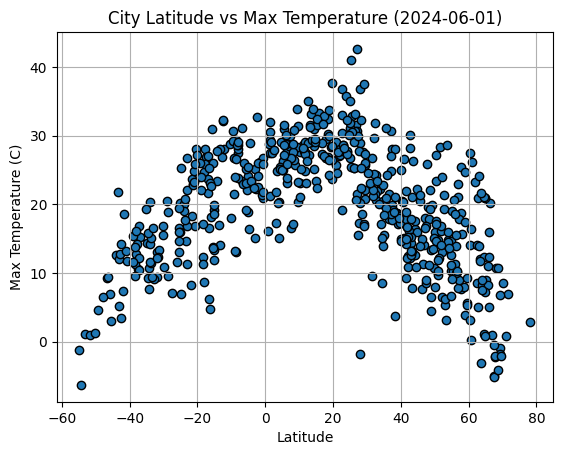

In [9]:
# Build scatter plot for latitude vs. temperature
fig1, ax1 = plt.subplots()
scatter1 = ax1.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Max Temperature (C)')
ax1.set_title('City Latitude vs Max Temperature (2024-06-01)')
ax1.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
fig1.savefig("output_data/Fig1.png")

# Show plot

#### Latitude Vs. Humidity

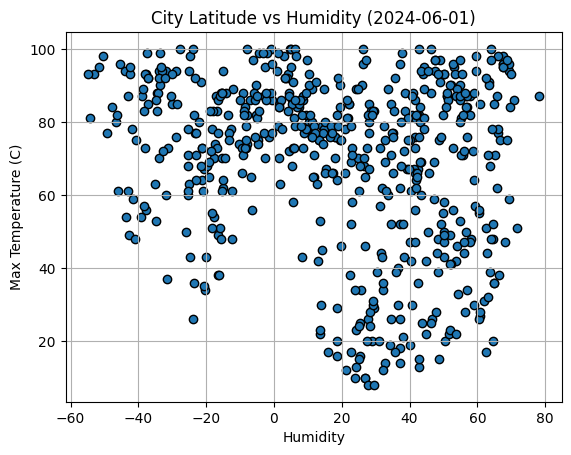

In [10]:
# Build the scatter plots for latitude vs. humidity
fig2, ax2 = plt.subplots()
scatter2 = ax2.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
ax2.set_xlabel('Humidity')
ax2.set_ylabel('Max Temperature (C)')
ax2.set_title('City Latitude vs Humidity (2024-06-01)')
ax2.grid()

# Save the figure
fig2.savefig("output_data/Fig2.png")

# Show plot


#### Latitude Vs. Cloudiness

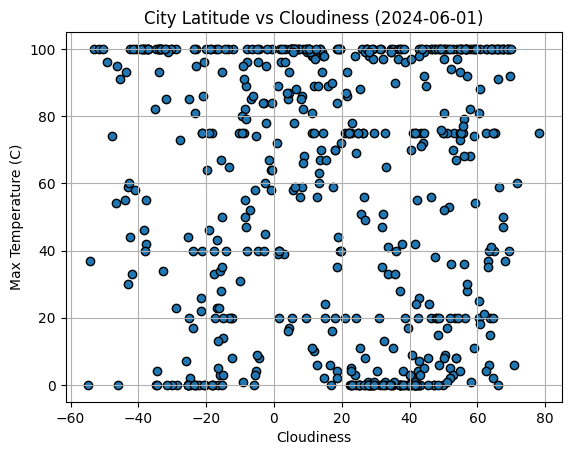

In [11]:
# Build the scatter plots for latitude vs. cloudiness
fig3, ax3 = plt.subplots()
scatter3 = ax3.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
ax3.set_xlabel('Cloudiness')
ax3.set_ylabel('Max Temperature (C)')
ax3.set_title('City Latitude vs Cloudiness (2024-06-01)')
ax3.grid()

# Save the figure
fig3.savefig("output_data/Fig3.png")

# Show plot


#### Latitude vs. Wind Speed Plot

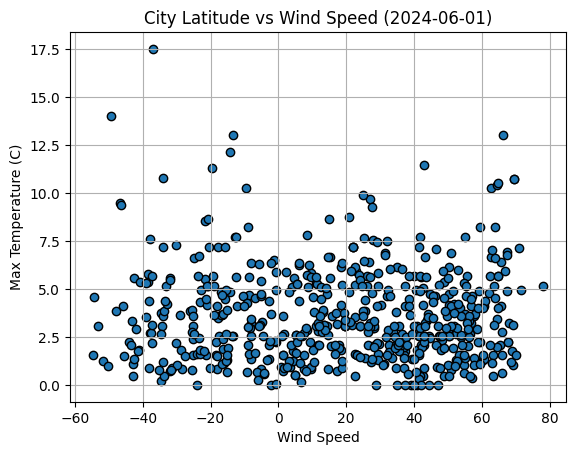

In [12]:
fig4, ax4 = plt.subplots()
scatter4 = ax4.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
ax4.set_xlabel('Wind Speed')
ax4.set_ylabel('Max Temperature (C)')
ax4.set_title('City Latitude vs Wind Speed (2024-06-01)')
ax4.grid()

# Save the figure
fig4.savefig("output_data/Fig4.png")

# Show plot

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'].ge(0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hami,42.8000,93.4500,28.24,13,26,4.16,CN,1717216071
2,college,64.8569,-147.8028,20.99,36,75,5.66,US,1717216071
5,georgetown,5.4112,100.3354,30.97,68,20,2.57,MY,1717216072
6,katsuren-haebaru,26.3369,127.8719,25.22,96,75,2.06,JP,1717216072
7,iskateley,67.6803,53.1512,-2.21,96,50,2.24,RU,1717216072


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'].lt(0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,20.25,63,85,2.40,PN,1717216071
3,port-aux-francais,-49.3500,70.2167,4.67,77,96,14.03,TF,1717216071
4,koungou,-12.7336,45.2042,26.84,78,20,7.72,YT,1717216071
11,papatowai,-46.5619,169.4708,9.29,80,54,9.49,NZ,1717216073
12,grytviken,-54.2811,-36.5092,-6.31,81,37,4.59,GS,1717216073


###  Temperature vs. Latitude Linear Regression Plot

In [15]:
northern_lats = northern_hemi_df['Lat']
southern_lats = southern_hemi_df['Lat']

R-squared is -0.722


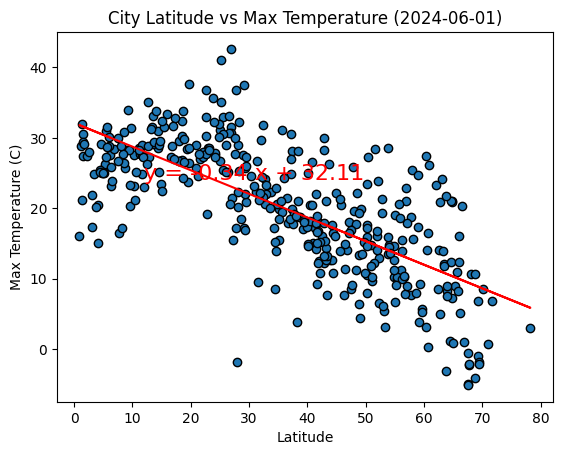

In [16]:
# Linear regression on Northern Hemisphere
x_vals = northern_lats
northern_maxT = northern_hemi_df['Max Temp']

lfig1n, lax1n = plt.subplots()

lax1n.scatter(x_vals, northern_maxT, edgecolors='black')
lax1n.set_xlabel('Latitude')
lax1n.set_ylabel('Max Temperature (C)')
lax1n.set_title('City Latitude vs Max Temperature (2024-06-01)')

(slope, intercept, r_squ, p_val, stderr) = linregress(x_vals, northern_maxT)

y_vals = slope * x_vals + intercept

# create linear regression line string
str_eq = f'y = {round(slope,2)} x + {round(intercept,2)}'

# plot linear regression line data
lax1n.plot(x_vals, y_vals, color= 'red')
x_pos = 12
y_pos = 12
lax1n.text(12, 24, str_eq, fontsize=16, color='red')
print(f'R-squared is {round(r_squ,3)}')


R-squared is 0.73


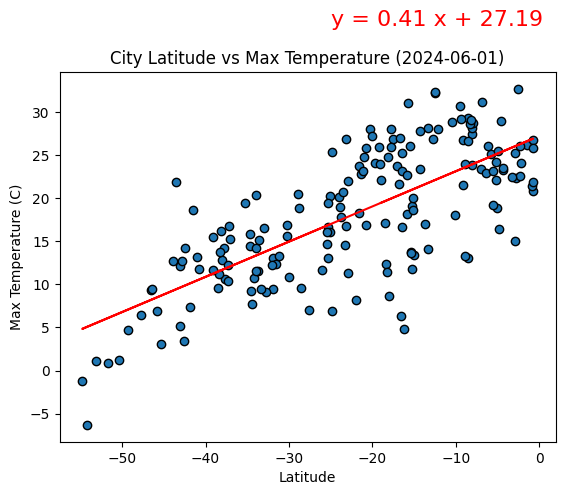

In [17]:
# Linear regression on Southern Hemisphere
x_vals = southern_lats
southern_maxT = southern_hemi_df['Max Temp']

lfig1s, lax1s = plt.subplots()

lax1s.scatter(x_vals, southern_maxT, edgecolors='black')
lax1s.set_xlabel('Latitude')
lax1s.set_ylabel('Max Temperature (C)')
lax1s.set_title('City Latitude vs Max Temperature (2024-06-01)')

(slope, intercept, r_squ, p_val, stderr) = linregress(x_vals, southern_maxT)

y_vals = slope * x_vals + intercept

# create linear regression line string
str_eq = f'y = {round(slope,2)} x + {round(intercept,2)}'

# plot linear regression line data
lax1s.plot(x_vals, y_vals, color= 'red')
x_pos = 12
y_pos = 12
lax1s.text(-25, 40, str_eq, fontsize=16, color='red')

print(f'R-squared is {round(r_squ,3)}')

**Discussion about the linear relationship:** The relatiopnship is not very linear for these cities in the upper hemisphere. The significant negative r-squared value indicates that the data may be better fit by a horizontal line, or other model.

The data in the southern hemisphere fits much better with an increasing latitude-increasing temperature hypothesis, but an r-squ of .8 is not amazing, indicating there are other significant influences beyond these 2

### Humidity vs. Latitude Linear Regression Plot

R-squared is -0.075


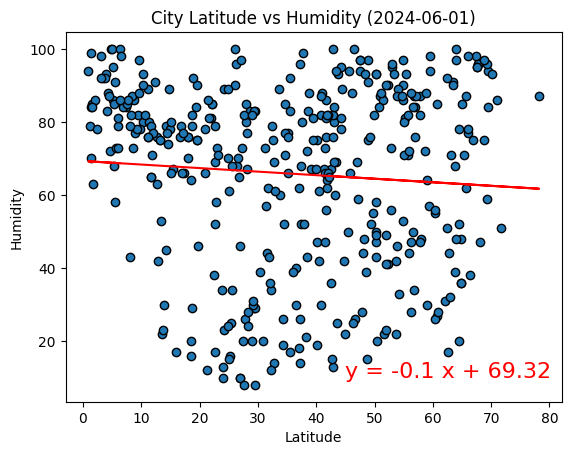

In [18]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_vals = northern_lats
northern_y = northern_hemi_df['Humidity']

lfig1n, lax1n = plt.subplots()

lax1n.scatter(x_vals, northern_y, edgecolors='black')
lax1n.set_xlabel('Latitude')
lax1n.set_ylabel('Humidity')
lax1n.set_title('City Latitude vs Humidity (2024-06-01)')

(slope, intercept, r_squ, p_val, stderr) = linregress(x_vals, northern_y)

y_vals = slope * x_vals + intercept

# create linear regression line string
str_eq = f'y = {round(slope,2)} x + {round(intercept,2)}'

# plot linear regression line data
lax1n.plot(x_vals, y_vals, color= 'red')
x_pos = 12
y_pos = 12
lax1n.text(45, 10, str_eq, fontsize=16, color='red')
print(f'R-squared is {round(r_squ,3)}')

R-squared is -0.012


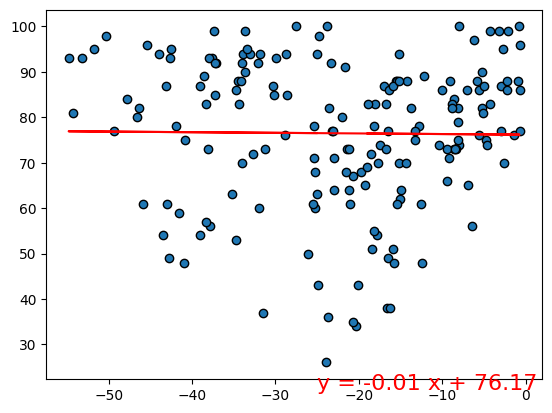

In [19]:
# Southern Hemisphere
x_vals = southern_lats
southern_y = southern_hemi_df['Humidity']

lfig1s, lax1s = plt.subplots()

lax1s.scatter(x_vals, southern_y, edgecolors='black')
lax1n.set_xlabel('Latitude')
lax1n.set_ylabel('Humidity')
lax1n.set_title('City Latitude vs Humidity (2024-06-01)')

(slope, intercept, r_squ, p_val, stderr) = linregress(x_vals, southern_y)

y_vals = slope * x_vals + intercept

# create linear regression line string
str_eq = f'y = {round(slope,2)} x + {round(intercept,2)}'

# plot linear regression line data
lax1s.plot(x_vals, y_vals, color= 'red')
x_pos = 12
y_pos = 12
lax1s.text(-25, 20, str_eq, fontsize=16, color='red')

print(f'R-squared is {round(r_squ,3)}')

**Discussion about the linear relationship:** The linear regression is modelling a potential relationship between latitude and humidity speed. There is no relationship between latitude and humidity, as indicated by a flat slope. The near 0 r-squared value indicates that the model is close to a horizontal line, the null hypothesis.

### Cloudiness vs. Latitude Linear Regression Plot

R-squared is -0.054


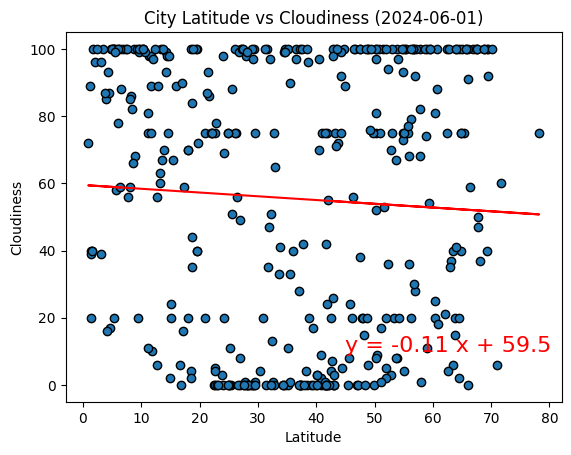

In [20]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_vals = northern_lats
northern_y = northern_hemi_df['Cloudiness']

lfig1n, lax1n = plt.subplots()

lax1n.scatter(x_vals, northern_y, edgecolors='black')
lax1n.set_xlabel('Latitude')
lax1n.set_ylabel('Cloudiness')
lax1n.set_title('City Latitude vs Cloudiness (2024-06-01)')

(slope, intercept, r_squ, p_val, stderr) = linregress(x_vals, northern_y)

y_vals = slope * x_vals + intercept

# create linear regression line string
str_eq = f'y = {round(slope,2)} x + {round(intercept,2)}'

# plot linear regression line data
lax1n.plot(x_vals, y_vals, color= 'red')
x_pos = 12
y_pos = 12
lax1n.text(45, 10, str_eq, fontsize=16, color='red')
print(f'R-squared is {round(r_squ,3)}')

R-squared is -0.107


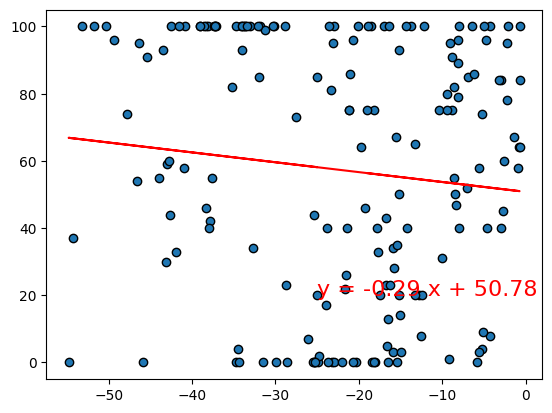

In [21]:
# Southern Hemisphere
x_vals = southern_lats
southern_y = southern_hemi_df['Cloudiness']

lfig1s, lax1s = plt.subplots()

lax1s.scatter(x_vals, southern_y, edgecolors='black')
lax1n.set_xlabel('Latitude')
lax1n.set_ylabel('Cloudiness')
lax1n.set_title('City Latitude vs Cloudiness (2024-06-01)')

(slope, intercept, r_squ, p_val, stderr) = linregress(x_vals, southern_y)

y_vals = slope * x_vals + intercept

# create linear regression line string
str_eq = f'y = {round(slope,2)} x + {round(intercept,2)}'

# plot linear regression line data
lax1s.plot(x_vals, y_vals, color= 'red')
x_pos = 12
y_pos = 12
lax1s.text(-25, 20, str_eq, fontsize=16, color='red')

print(f'R-squared is {round(r_squ,3)}')

**Discussion about the linear relationship:** The linear regression is modelling a potential relationship between latitude and cloudiness. There is no relationship between latitude and humidity, as indicated by a flat slope. The near 0 r-squared value indicates that the model is close to a horizontal line, the null hypothesis. The negative r-squared indicates the fit may be better as a simple horizontal line

### Wind Speed vs. Latitude Linear Regression Plot

R-squared is 0.091


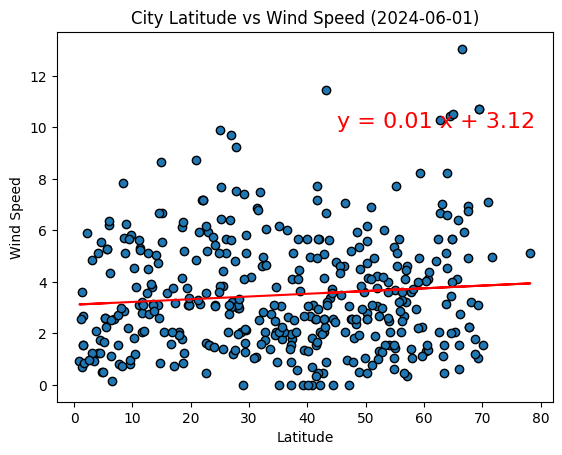

In [22]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_vals = northern_lats
northern_y = northern_hemi_df['Wind Speed']

lfig1n, lax1n = plt.subplots()

lax1n.scatter(x_vals, northern_y, edgecolors='black')
lax1n.set_xlabel('Latitude')
lax1n.set_ylabel('Wind Speed')
lax1n.set_title('City Latitude vs Wind Speed (2024-06-01)')

(slope, intercept, r_squ, p_val, stderr) = linregress(x_vals, northern_y)

y_vals = slope * x_vals + intercept

# create linear regression line string
str_eq = f'y = {round(slope,2)} x + {round(intercept,2)}'

# plot linear regression line data
lax1n.plot(x_vals, y_vals, color= 'red')
x_pos = 12
y_pos = 12
lax1n.text(45, 10, str_eq, fontsize=16, color='red')
print(f'R-squared is {round(r_squ,3)}')

R-squared is -0.051


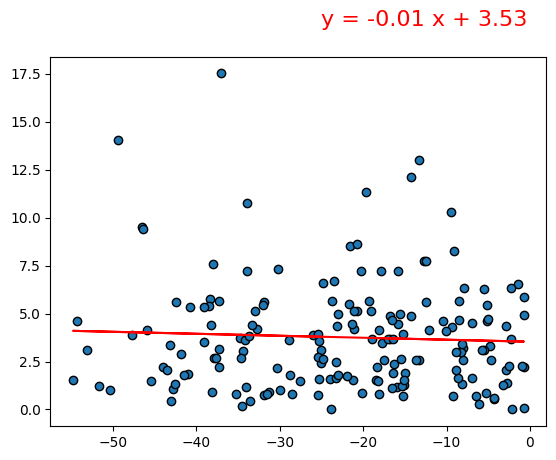

In [23]:
# Southern Hemisphere
# Southern Hemisphere
x_vals = southern_lats
southern_y = southern_hemi_df['Wind Speed']

lfig1s, lax1s = plt.subplots()

lax1s.scatter(x_vals, southern_y, edgecolors='black')
lax1n.set_xlabel('Latitude')
lax1n.set_ylabel('Wind Speed')
lax1n.set_title('City Latitude vs Wind Speed (2024-06-01)')

(slope, intercept, r_squ, p_val, stderr) = linregress(x_vals, southern_y)

y_vals = slope * x_vals + intercept

# create linear regression line string
str_eq = f'y = {round(slope,2)} x + {round(intercept,2)}'

# plot linear regression line data
lax1s.plot(x_vals, y_vals, color= 'red')
x_pos = 12
y_pos = 12
lax1s.text(-25, 20, str_eq, fontsize=16, color='red')

print(f'R-squared is {round(r_squ,3)}')

**Discussion about the linear relationship:** The linear regression is modelling a potential relationship between latitude and wind speed. There is no relationship between latitude and humidity, as indicated by a flat slope. The near 0 r-squared value indicates that the model is close to a horizontal line, the null hypothesis.